In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil1e9/loan-default")

print("Path to dataset files:", path)

100%|██████████| 7.86M/7.86M [00:00<00:00, 131MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nikhil1e9/loan-default/versions/2


In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/nikhil1e9/loan-default/versions/2/Loan_default.csv")

In [ ]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
df.describe()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
df.isna().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

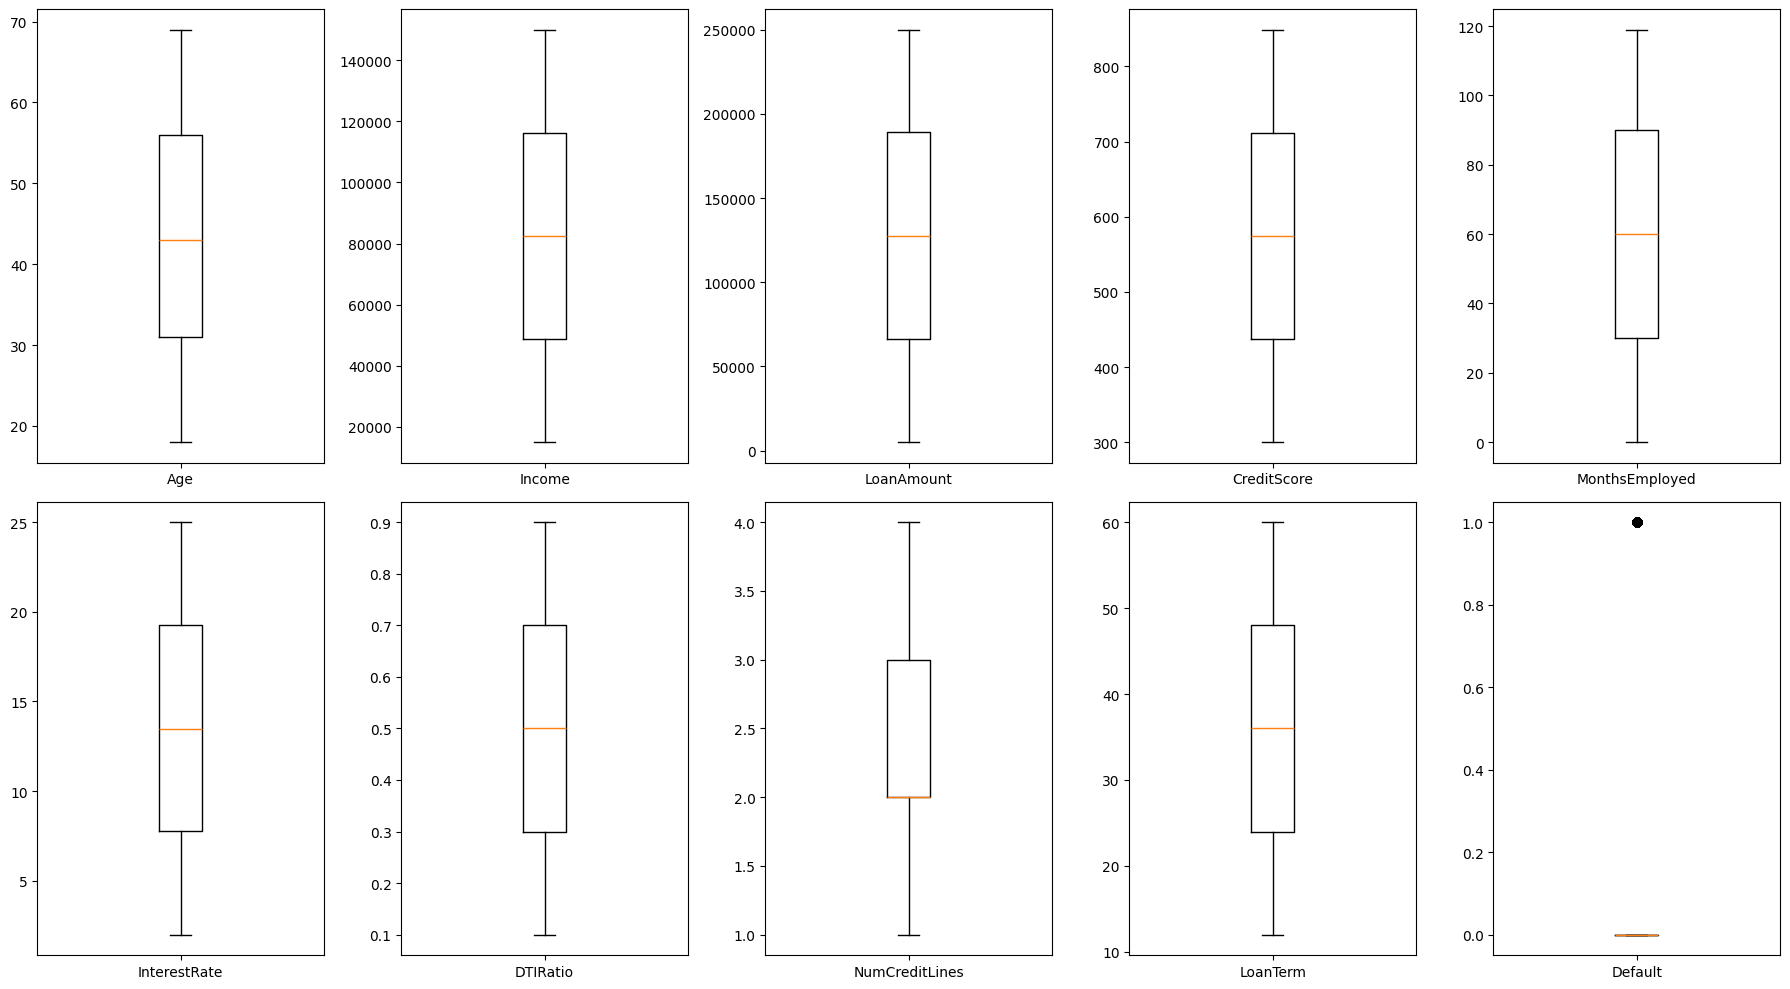

In [ ]:
#check Outlier
numeric_cols = ["Age","Income",'LoanAmount','CreditScore','MonthsEmployed','InterestRate','DTIRatio','NumCreditLines','LoanTerm','Default']
fig,axes = plt.subplots(figsize = (18,10), nrows =2 , ncols=5,squeeze = 0)
i = 0
for ax, col in zip(axes.reshape(-1), numeric_cols):
 ax.boxplot(df[col], tick_labels=[col], sym='k')
plt.tight_layout()


In [ ]:
#Encoding
col = ['Education',
 'EmploymentType'  ,
  'MaritalStatus'  ,
 'HasMortgage' ,
 'HasDependents',
 'LoanPurpose',
   'HasCoSigner']

In [ ]:
df_encode = pd.get_dummies(df , columns = col,drop_first = True)


In [ ]:
df_encode.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,False,False,False,True,True,False,False,False,True,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,False,True,False,False,False,False,False,False,True,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,True,False,False,True,True,False,False,False,False,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,False,True,False,False,False,True,False,False,False,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
df_encode.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Default', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_Yes',
       'HasDependents_Yes', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other', 'HasCoSigner_Yes'],
      dtype='object')

In [ ]:
df_encode["Education_High School"] = df_encode["Education_High School"].astype(int)
df_encode["Education_Master's"] = df_encode["Education_Master's"].astype(int)
df_encode["Education_PhD"] = df_encode["Education_PhD"].astype(int)
df_encode["EmploymentType_Self-employed"] = df_encode["EmploymentType_Self-employed"].astype(int)
df_encode["MaritalStatus_Married"] = df_encode["MaritalStatus_Married"].astype(int)
df_encode["EmploymentType_Part-time"] = df_encode["EmploymentType_Part-time"].astype(int)
df_encode["EmploymentType_Unemployed"] = df_encode["EmploymentType_Unemployed"].astype(int)
df_encode["MaritalStatus_Single"] = df_encode["MaritalStatus_Single"].astype(int)
df_encode["HasMortgage_Yes"] = df_encode["HasMortgage_Yes"].astype(int)
df_encode["HasDependents_Yes"] = df_encode["HasDependents_Yes"].astype(int)
df_encode["LoanPurpose_Business"] = df_encode["LoanPurpose_Business"].astype(int)
df_encode["LoanPurpose_Education"] = df_encode["LoanPurpose_Education"].astype(int)
df_encode["LoanPurpose_Home"] = df_encode["LoanPurpose_Home"].astype(int)
df_encode["LoanPurpose_Other"] = df_encode["LoanPurpose_Other"].astype(int)
df_encode["HasCoSigner_Yes"] = df_encode["HasCoSigner_Yes"].astype(int)


In [ ]:
df_encode.dtypes


,0
LoanID,object
Age,int64
Income,int64
LoanAmount,int64
CreditScore,int64
MonthsEmployed,int64
NumCreditLines,int64
InterestRate,float64
LoanTerm,int64
DTIRatio,float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = df_encode.drop(['Default','LoanID'], axis=1) # features
y = df_encode['Default']  # target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80/20


In [ ]:
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,0,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
y.head()

,Default
0,0
1,0
2,1
3,0
4,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")

Decision Tree Accuracy: 0.8018


In [ ]:
#LogisticRegression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test,y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

Logistic Regression Accuracy: 0.8833


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#RandomForest
rand_forest = RandomForestClassifier(random_state=17)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
accuracy_rand_forest = accuracy_score(y_test,y_pred_rand_forest)
print(f"RandomForestClassifier Accuracy: {accuracy_rand_forest:.4f} ")



RandomForestClassifier Accuracy: 0.8839 


In [ ]:
# XGBoost
xgBoost = XGBClassifier()
xgBoost.fit(X_train,y_train)
y_pred_xgBoost = xgBoost.predict(X_test)
accuracy_xgBoost = accuracy_score(y_test,y_pred_xgBoost)
print(f"XGBoost Accuracy: {accuracy_xgBoost:.4f}")

XGBoost Accuracy: 0.8841


In Conclusion , We choose XGBoost Model since  it has the highest accuracy of 0.8841